## Data Exploration and Data Cleaning

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk

In [2]:
df = pd.read_csv(r"D:\Download_1\FakeNewsDataset-1\News _dataset\MergedDataset.csv")

In [3]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [4]:
df.tail()

,title,text,subject,date,label
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


### Description of Data

In [5]:
df.describe()

,label
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [7]:
df.isnull()

,title,text,subject,date,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
44893,False,False,False,False,False
44894,False,False,False,False,False
44895,False,False,False,False,False
44896,False,False,False,False,False


### Checking if there are any NULL Values

In [8]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [9]:
df.shape

(44898, 5)

In [10]:
df['label'].value_counts()

label
1    23481
0    21417
Name: count, dtype: int64

### Checking weather the Data is Balanced or Not

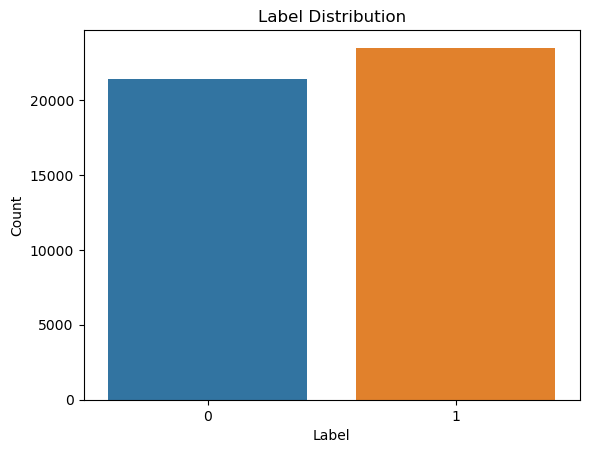

In [11]:
label_counts = df['label'].value_counts()

# Plotting the bar plot
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [12]:
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [13]:
df.iloc[0]

title      As U.S. budget fight looms, Republicans flip t...
text       WASHINGTON (Reuters) - The head of a conservat...
subject                                         politicsNews
date                                      December 31, 2017 
label                                                      0
Name: 0, dtype: object

In [14]:
df.iloc[0]['title']

'As U.S. budget fight looms, Republicans flip their fiscal script'

### Dealing with Duplicate rows

In [15]:
df.duplicated().sum()

209

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [18]:
df.shape

(44689, 5)

In [19]:
df.iloc[0]['text']

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

### Dropping the Date, Title, Subject Columns

In [20]:
df = df.drop(columns=['date', 'title', 'subject'])


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44689 non-null  object
 1   label   44689 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


## Data Preprocessing

### Lowercasing  the Text

In [22]:
df['text'] = df['text'].str.lower()

### Removing Punctuations

In [23]:
#remove punctuations like -  !"#$%&'()*+,-./:;<=>?@[\]^_{|}~
df['text'] = df['text'].str.replace(f"[{string.punctuation}]", "", regex=True)

### Removing Stop Words

In [24]:
# stopwords - (e.g., "is", "and", "the") 

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

df['text'] = df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Tokenization of  the Text

In [25]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

df['text'] = df['text'].apply(tokenize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Stemming

In [26]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem text (handles tokenized lists)
def stem_tokens(tokens):
    return ' '.join([stemmer.stem(word) for word in tokens])

# Apply stemming to the 'text' column (assuming tokenized list of words)
df['text'] = df['text'].apply(stem_tokens)

### Lemmatization

In [27]:
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens (list)
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization to the 'text' column (assuming it's a list of tokens)
df['text'] = df['text'].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [28]:
# Convert list of characters back into strings
df['text'] = df['text'].apply(lambda x: ''.join(x))

In [30]:
df

,text,label
0,washington reuter head conserv republican fact...,0
1,washington reuter transgend peopl allow first ...,0
2,washington reuter special counsel investig lin...,0
3,washington reuter trump campaign advis georg p...,0
4,seattlewashington reuter presid donald trump c...,0
...,...,...
44893,21st centuri wire say 21wire report earlier we...,1
44894,21st centuri wire say familiar theme whenev di...,1
44895,patrick henningsen 21st centuri wirerememb oba...,1
44896,21st centuri wire say al jazeera america go hi...,1


## Multi - Layer Perceptron

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [33]:
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text']).toarray()
y = df['label'].values

In [34]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Build and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 128), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(512, 256, 128), max_iter=300)

In [36]:
# Predict on the test set
y_pred = mlp.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 99.18%
